In [6]:
# 문장 토큰화
# 기본로직
    # 마침표, 느낌표, 물음표 를 문장 끝 후보로 인식
    # 약어 패턴 학습(Dr, Mr, U.S.A 등)
    # 대문자로 시작하는지 확인
    # 통계적 모델을 사용해 진짜 문장 경계인지 판단
# 다국어
# 약어와 실제 문장 끝을 구분하는 기계 학습 모델 내장

# 단어 토큰화 word_tokenization
    # 공백 기준 단어 분리
    # 구두점을 별도 토큰으로 분리
    # 축약형 처리 it's, it, s
    # 소유격 처리 Let's -> Let, s

    # 구두점 기반 WordPuctTokenizer
    # 모든 구두점을 분리
    # It's -> It, ' , s

    # 정규 표현식 RegexpTokenizer

# 노이즈와 불용어 제거
    # set 자료구조 : 중복 제거
    # List Comprehension : 필터링
    # NLTK 불용어사전


In [7]:
%pip install nltk
from nltk.tokenize import sent_tokenize
import nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
nltk.download('wordnet')
nltk.download('webtext')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\31799\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\31799\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\31799\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\31799\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\31799\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
sentence = "Hello everyone. It's good to see you. Let's start our text mining class"
sent_tokenize(sentence)

['Hello everyone.',
 "It's good to see you.",
 "Let's start our text mining class"]

In [10]:
sentence_kor = '안녕하세요, 여러분. 만나서 반갑습니다. 이제 학습을 시작해 볼까요?'
sent_tokenize(sentence_kor)

['안녕하세요, 여러분.', '만나서 반갑습니다.', '이제 학습을 시작해 볼까요?']

In [11]:
from nltk.tokenize import word_tokenize
word_tokenize(sentence_kor)

['안녕하세요', ',', '여러분', '.', '만나서', '반갑습니다', '.', '이제', '학습을', '시작해', '볼까요', '?']

In [12]:
from nltk.tokenize import WordPunctTokenizer
WordPunctTokenizer().tokenize(sentence)

['Hello',
 'everyone',
 '.',
 'It',
 "'",
 's',
 'good',
 'to',
 'see',
 'you',
 '.',
 'Let',
 "'",
 's',
 'start',
 'our',
 'text',
 'mining',
 'class']

In [13]:
# 정규식 토큰화
import re
re.findall("[abc]","how are you, boy")


['a', 'b']

In [14]:
# 노이즈와 불용어 제거
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

english_stops = stopwords.words('english')
test1 = "Sorry, I couldn't go to movies today"
# tokens = word_tokenize(test1)
tokenizer = RegexpTokenizer("[\\w']+")
tokens = tokenizer.tokenize(test1.lower())


[token for token in tokens if token not in english_stops]

['sorry', 'go', 'movies', 'today']

In [15]:

# 소문자 a-z로 이루어진 문자열에서 4글자 이상
RegexpTokenizer("[a-z]{4,}")

RegexpTokenizer("[\\w']{3,}")   # 3글자 이상

RegexpTokenizer("[\\w]")  # 어퍼스트로피를 패턴에서 제외

RegexpTokenizer(pattern='[\\w]', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [16]:
# 어간 추출(Stemming)
# 줄기 stem 단어에서 불필요한 요소를 제거하고 남는 핵삼 형태
# 단어는 다양한 형태 -> 복수형 과거형과 같은 시제 변환, 복수형
# 단어를 통일
    # walk -> walks walking walked -> 어간 walk

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks')

('cook', 'cookeri', 'cookbook')

In [17]:
# PorterStemmer
    # 규칙 기반 -> 완벽하지 않다
    # 속도가 빠르다

In [18]:
# 표제어 추출 Lemmatization
# Lemma 단어의 사전 기본형
# 단어의 변형(시제, 복수, 비교급) 등을 사전에 나오는 정확한 원형으로 변환
# 어간처럼 단어줄기가 아니라 맥락과 품사를 고려한 올바른 형태
# better -> good
# 먹었다 -> 먹다
# 알고리즘 : 형태소 분석기(konlpy) 를 사용해 품사(명사, 동사 등)를 보고 정확히 변환

In [19]:
# 주요목적
    # 어간추출처럼 대충 줄이지 않고 맥락에 맞는 정확한 단어로 만들어서 NLP 품질 향상
    # 단점 : 사전에 의존해서 언어/맥락 제한

In [20]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
print(lemma.lemmatize('cooking'))
print(lemma.lemmatize('cooking',pos='v'))

cooking
cook


In [21]:
# n => noun(명사)
# v => verb(동사)
# a => adjective(형용사)
# r => adverb(부사)

In [22]:
lemma.lemmatize('better'), lemma.lemmatize('better',pos='a')

('better', 'good')

In [23]:
# 품사 태깅
import nltk
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger_eng')

sentence = "Hello everyone. It's good to see you. Let's start our text mining class!"
tokens = word_tokenize(sentence)

nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\31799\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('Hello', 'NNP'),
 ('everyone', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('good', 'JJ'),
 ('to', 'TO'),
 ('see', 'VB'),
 ('you', 'PRP'),
 ('.', '.'),
 ('Let', 'VB'),
 ("'s", 'POS'),
 ('start', 'VB'),
 ('our', 'PRP$'),
 ('text', 'NN'),
 ('mining', 'NN'),
 ('class', 'NN'),
 ('!', '.')]

In [24]:
# 품사 태그 정보 확인
nltk.download('tagsets_json')
nltk.help.upenn_tagset('VB')


VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


[nltk_data] Downloading package tagsets_json to
[nltk_data]     C:\Users\31799\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!


In [25]:
# 특정 품사 추출 -> 명사 동사 형용사 등
tag_list = ['NN','VB','JJ']
[word for word,tag in nltk.pos_tag(tokens) if tag in tag_list]

['everyone', 'good', 'see', 'Let', 'start', 'text', 'mining', 'class']

In [26]:
# NLTK는 영어 기반 -> 한국어의 조사분리 불가능, 어미변화처리 불가능
# KoNlpy Okt 사용 해결

In [27]:
%pip install JPype1
%pip install konlpy

  Using cached jpype1-1.6.0-cp313-cp313-win_amd64.whl.metadata (5.1 kB)
Using cached jpype1-1.6.0-cp313-cp313-win_amd64.whl (355 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached lxml-6.0.2-cp313-cp313-win_amd64.whl.metadata (3.7 kB)
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
Using cached lxml-6.0.2-cp313-cp313-win_amd64.whl (4.0 MB)

   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   -------------------- ------------------- 1/2 [konlpy]
   -------------------- ------------------- 1/2 [konlpy]
   ---------------------------------------- 2/2 [konlpy]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from konlpy.tag import Okt
t = Okt()

In [54]:
sentence = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''
tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

['절망의', '반대가', '희망은', '아니다', '.', '어두운', '밤하늘에', '별이', '빛나듯', '희망은', '절망', '속에', '싹트는', '거지', '만약에', '우리가', '희망함이', '적다면', '그', '누가', '세상을', '비출어줄까', '.', '정희성', ',', '희망', '공부']
[('절망의', 'JJ'), ('반대가', 'NNP'), ('희망은', 'NNP'), ('아니다', 'NNP'), ('.', '.'), ('어두운', 'VB'), ('밤하늘에', 'JJ'), ('별이', 'NNP'), ('빛나듯', 'NNP'), ('희망은', 'NNP'), ('절망', 'NNP'), ('속에', 'NNP'), ('싹트는', 'NNP'), ('거지', 'NNP'), ('만약에', 'NNP'), ('우리가', 'NNP'), ('희망함이', 'NNP'), ('적다면', 'NNP'), ('그', 'NNP'), ('누가', 'NNP'), ('세상을', 'NNP'), ('비출어줄까', 'NNP'), ('.', '.'), ('정희성', 'NN'), (',', ','), ('희망', 'NNP'), ('공부', 'NNP')]


In [58]:
# NNP 고유명사... 대부분 고유명사로 잘못 인식
from konlpy.tag import Okt
okt = Okt()
print(f'형태소 : {t.morphs(sentence)}')
print(f'명사 : {t.nouns(sentence)}')
print(f'품사 태깅 : {t.pos(sentence)}')


형태소 : ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비출어줄까', '.', '\n', '정희성', ',', '희망', '공부']
명사 : ['절망', '반대', '희망', '어', '두운', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '우리', '희망', '함', '그', '누가', '세상', '정희성', '희망', '공부']
품사 태깅 : [('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상',

In [66]:
# 그래프와 워드클라우드
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
gutenberg.fileids()
doc_alice = gutenberg.open('carroll-alice.txt').read()
print(doc_alice[:500])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\31799\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [70]:
# 토큰화 및 전처리
from nltk.tokenize import word_tokenize

tokens_alice = word_tokenize(doc_alice)
print(len(tokens_alice))

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")
reg_alice = tokenizer.tokenize(doc_alice.lower())
print(len(reg_alice))

33535
21616


<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\31799\AppData\Local\Temp\ipykernel_12836\3458579255.py:8: SyntaxWarning: invalid escape sequence '\w'
  tokenizer = RegexpTokenizer("[\w']{3,}")


In [72]:
# 불용어 제거
from nltk.corpus import stopwords
english_stops = stopwords.words('english')
result_alice = [word for word in reg_alice if word not in english_stops]
len(result_alice)

12871

In [74]:
# 4. 품사 태깅 및 필터링 (명사 동사 형용사만)
my_tag_set = ['NN', 'VB', 'JJ', 'VBD']
my_word = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

In [80]:
from collections import Counter
sorted_word_count = dict(Counter(my_word))

In [82]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


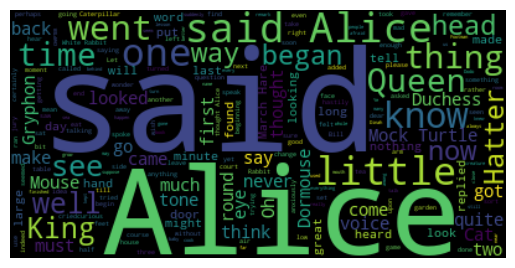

In [85]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate(doc_alice)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

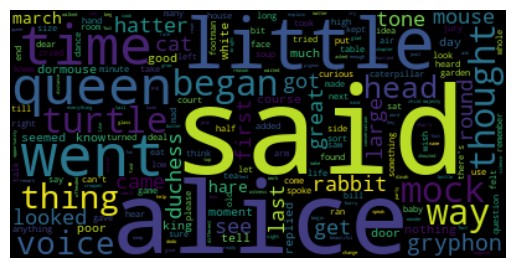

In [87]:
wc = wordcloud.generate_from_frequencies(sorted_word_count)
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

카운트기반 문서표현  방법 Bag of Words, TF-IDF

In [88]:
# 영화 리뷰 데이터셋 로드
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\31799\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\31799\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
# 데이터셋 구조 확인
from nltk.corpus import movie_reviews
print(f'review count: {len(movie_reviews.fileids())}')
print(f'categories: {movie_reviews.categories()}')
print(f'fileids: {movie_reviews.fileids()}')

review count: 2000
categories: ['neg', 'pos']
fileids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt', 'neg/cv010_29063.txt', 'neg/cv011_13044.txt', 'neg/cv012_29411.txt', 'neg/cv013_10494.txt', 'neg/cv014_15600.txt', 'neg/cv015_29356.txt', 'neg/cv016_4348.txt', 'neg/cv017_23487.txt', 'neg/cv018_21672.txt', 'neg/cv019_16117.txt', 'neg/cv020_9234.txt', 'neg/cv021_17313.txt', 'neg/cv022_14227.txt', 'neg/cv023_13847.txt', 'neg/cv024_7033.txt', 'neg/cv025_29825.txt', 'neg/cv026_29229.txt', 'neg/cv027_26270.txt', 'neg/cv028_26964.txt', 'neg/cv029_19943.txt', 'neg/cv030_22893.txt', 'neg/cv031_19540.txt', 'neg/cv032_23718.txt', 'neg/cv033_25680.txt', 'neg/cv034_29446.txt', 'neg/cv035_3343.txt', 'neg/cv036_18385.txt', 'neg/cv037_19798.txt', 'neg/cv038_9781.txt', 'neg/cv039_5963.txt', 'neg/cv040_8829.txt', 'neg/cv04